<a href="https://colab.research.google.com/github/AbdulmagedALKHULAIFI/Automatic-classifer-consumer-goods/blob/main/p6_2_IMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# pip install --upgrade pip

In [17]:
# pip install --upgrade Pillow

In [18]:
pip install opencv-python==3.4.2.17

In [19]:
 pip install opencv-contrib-python==3.4.2.17

#Import

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import cv2
from sklearn.cluster import MiniBatchKMeans
from sklearn import preprocessing
from os import listdir


In [38]:
#Variable globales
imgs_path = "/content/drive/MyDrive/OC/Projet 6/data/Images/"
preprocessed_imgs_path = '/content/drive/MyDrive/OC/Projet 6/data/preprocessed_images/'
list_photos = [file for file in listdir(imgs_path)]
print(len(list_photos))

1050


# Analyses exploratoires

In [22]:
data = pd.read_csv("/content/drive/MyDrive/OC/Projet 6/flipkart_com-ecommerce_sample_1050.csv")
data.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


#Prétraitement des images

In [23]:
data = data[['image',"product_category_tree"]].copy('deep')
data

,image,product_category_tree
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >>..."
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1047,5912e037d12774bb73a2048f35a00009.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."


Nous allons maintenant nous interesser aux catégories principaux des images.

In [24]:
data['main_category'] = data.product_category_tree.str.split(">>",expand=True,)[0]
data['main_category'] = data['main_category'].str.replace(r'"', '')
data['main_category'] = data['main_category'].str.replace(r'[', '')
data['main_category'] = data['main_category'].str.replace(r']', '')
data.head(3)

,image,product_category_tree,main_category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >>...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care


In [25]:
data = data.drop(axis=1,columns = 'product_category_tree')
data.head(3)

,image,main_category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care


Nous allons maintenant ajouté le chemin des images sur le drive. Vous pouvez le remplacer par l'addresse à votre convenance.

In [26]:
path = imgs_path
data['image'] = path + data['image'].astype(str)
data.head(3)

,image,main_category
0,/content/drive/MyDrive/OC/Projet 6/data/Images...,Home Furnishing
1,/content/drive/MyDrive/OC/Projet 6/data/Images...,Baby Care
2,/content/drive/MyDrive/OC/Projet 6/data/Images...,Baby Care


## Etiquetage des images

In [30]:
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["main_category"])
data

,image,main_category,label
0,/content/drive/MyDrive/OC/Projet 6/data/Images...,Home Furnishing,4
1,/content/drive/MyDrive/OC/Projet 6/data/Images...,Baby Care,0
2,/content/drive/MyDrive/OC/Projet 6/data/Images...,Baby Care,0
3,/content/drive/MyDrive/OC/Projet 6/data/Images...,Home Furnishing,4
4,/content/drive/MyDrive/OC/Projet 6/data/Images...,Home Furnishing,4
...,...,...,...
1045,/content/drive/MyDrive/OC/Projet 6/data/Images...,Baby Care,0
1046,/content/drive/MyDrive/OC/Projet 6/data/Images...,Baby Care,0
1047,/content/drive/MyDrive/OC/Projet 6/data/Images...,Baby Care,0
1048,/content/drive/MyDrive/OC/Projet 6/data/Images...,Baby Care,0


In [31]:
data.groupby("label").count()

,image,main_category
label,,
0,150,150
1,150,150
2,150,150
3,150,150
4,150,150
5,150,150
6,150,150


In [32]:
def list_images(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["main_category"][i]==name]
    return list_image_name

In [34]:
data.main_category.unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [39]:
list_home_furnishing=[list_photos[i] for i in range(len(data)) if data["main_category"][i]=="Home Furnishing "]
list_baby_care=[list_photos[i] for i in range(len(data)) if data["main_category"][i]=="Baby Care "]
list_watches=[list_photos[i] for i in range(len(data)) if data["main_category"][i]=="Watches "]
list_home_decor_festive =[list_photos[i] for i in range(len(data)) if data["main_category"][i]=="Home Decor & Festive Needs "]
list_kitchen_dining =[list_photos[i] for i in range(len(data)) if data["main_category"][i]=="Kitchen & Dining "]
list_beauty_personal_care =[list_photos[i] for i in range(len(data)) if data["main_category"][i]=="Beauty and Personal Care "]
list_computers = [list_photos[i] for i in range(len(data)) if data["main_category"][i]=="Computers "]

In [ ]:
def resize_image(img, size, interpolation):
    """Function to resize image without deformation."""
    
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    
    if h == w: return cv2.resize(img, (size, size), interpolation)
    if h > w: dif = h 
    else:     dif = w
        
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    
    if c is None:
        # mask = np.zeros((dif, dif), dtype=img.dtype)
        mask = np.full((dif, dif), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
        
    else:
        # mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask = np.full((dif, dif, c), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
        
    return cv2.resize(mask, (size, size), interpolation)

In [ ]:
# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    '''
    # Calculate new histogram with desired range and show histogram 
    new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist)
    plt.xlim([0,256])
    plt.show()
    '''

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)


(224, 224, 3)


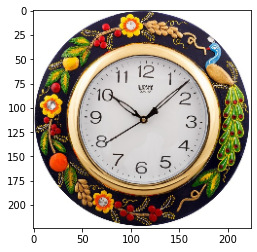

In [ ]:
squared_image=resize_image(RGB_im, size=224, interpolation=cv2.INTER_AREA)
print(squared_image.shape)
plt.imshow(squared_image)

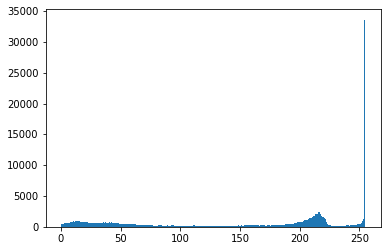

In [ ]:
n, bins, patches = plt.hist(squared_image.flatten(), bins=range(256))
plt.show()

In [ ]:
dir_read = imgs_path
dir_write = preprocessed_imgs_path

def preprocess_images():

  # for each product in the data
  for index, row in df_pict.iterrows():
      
      # get url of the product's image
      img_name = row['image']
      
      # create the path to the image file
      img_path = dir_read+img_name
      
      # Read the file and convert it to color image
      img_file = cv2.imread(img_path)
      img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
      
      # resize the image to 224*224 pixels
      img_sqr = resize_image(img_rgb, size=224, interpolation=cv2.INTER_AREA)
      
      # auto-adjustment of contrast and luminosity
      img_preprocessed, alpha, beta = automatic_brightness_and_contrast(img_sqr)
      
      # save the preprocessed image
      img_preprocessed_path = dir_write+img_name
      cv2.imwrite(img_preprocessed_path, img_preprocessed)

In [ ]:
# preprocess_images()

# Modelisation


##  Extraction des features et *descripteurs*

### ORB

In [ ]:
def get_descriptors(model,image_path):
    
    # load image and convert it to grayscale
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # detect key points and descriptors
    keypoints, descriptors = model.detectAndCompute(img_gray, None)

    # returns keypoints and descriptors
    return keypoints, descriptors

In [ ]:
orb = cv2.ORB_create()

In [ ]:
#Example with one photo
img_keypoints, img_descriptors = get_descriptors(orb,img1_fullname)

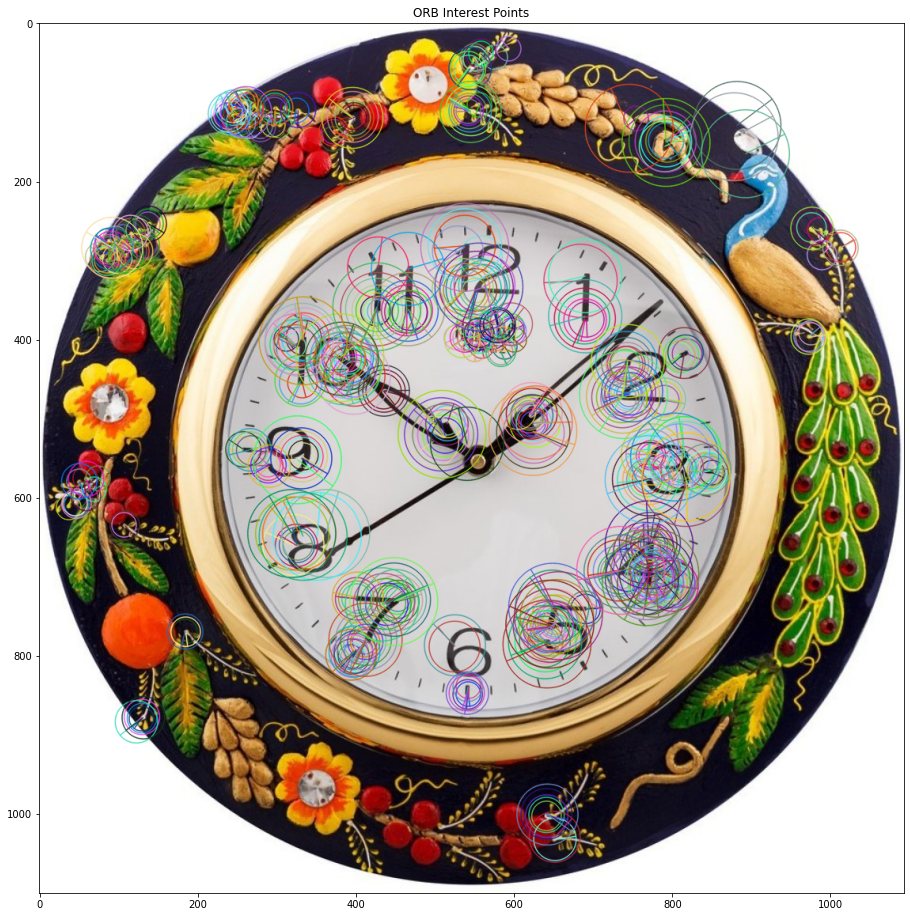

In [ ]:
img = cv2.imread(img1_fullname)
img_clock = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img_clock, None)
img_building_keypoints = cv2.drawKeypoints(img_clock, 
                                           key_points, 
                                           img_clock, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

In [ ]:
print("We get, for each image, {} keypoints and descriptors of {} dimensions."
      .format(img_descriptors.shape[0], img_descriptors.shape[1]))

We get, for each image, 500 keypoints and descriptors of 32 dimensions.


In [ ]:
def attribute_images_descriptors(data,img_directory_path,algo,new_column_name):
  
  data.loc[:,new_column_name] = pd.Series(index=data.index)
  data[new_column_name] = data[new_column_name].astype(object)

  # computing descriptors for each image of product
  for index, row in data.iterrows():
      
      # get url of the product's image
      img_name = row['image']
      
      # create the path to the image file
      img_path = img_directory_path + img_name
      
      # get the keypoints and descriptors of image
      img_keypoints, img_descriptors = get_descriptors(algo,img_path)
      
      # add descriptors into a new column of the dataframe
      data.at[index, new_column_name] = img_descriptors

  return data

In [ ]:
data = attribute_images_descriptors(data,preprocessed_imgs_path,orb,'orb_descriptors')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data = data[['description','image','orb_descriptors']]
data.head(3)

,description,image,orb_descriptors
0,Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[73, 176, 190, 189, 75, 95, 177, 121, 118, 25..."
1,Specifications of Sathiyas Cotton Bath Towel (...,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[[6, 8, 130, 155, 20, 131, 170, 65, 22, 128, 8..."
2,Key Features of Eurospa Cotton Terry Face Towe...,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[[65, 160, 149, 181, 114, 11, 169, 43, 62, 49,..."


### SIFT

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
data = attribute_images_descriptors(data,preprocessed_imgs_path,sift,'sift_descriptors')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.head(3)

,description,image,orb_descriptors,sift_descriptors
0,Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[73, 176, 190, 189, 75, 95, 177, 121, 118, 25...","[[9.0, 0.0, 1.0, 3.0, 3.0, 2.0, 13.0, 22.0, 11..."
1,Specifications of Sathiyas Cotton Bath Towel (...,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[[6, 8, 130, 155, 20, 131, 170, 65, 22, 128, 8...","[[119.0, 77.0, 0.0, 0.0, 5.0, 5.0, 0.0, 2.0, 1..."
2,Key Features of Eurospa Cotton Terry Face Towe...,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[[65, 160, 149, 181, 114, 11, 169, 43, 62, 49,...","[[5.0, 2.0, 2.0, 0.0, 0.0, 13.0, 147.0, 19.0, ..."


## Segementation des descripteurs

In [ ]:
# set the size of the vocabulary of visual words
vocabulary_size = 1000

# instanciate a clustering model
kmeans = MiniBatchKMeans(
    n_clusters=vocabulary_size,
    random_state=42,
    init_size=3000,
)

In [ ]:
descriptors = [data['sift_descriptors']]
desc = np.reshape(descriptors, (len(descriptors)//128, 128))
desc = np.float32(desc)

ValueError: ignored

In [ ]:
kmeans.fit(data['orb_descriptors'])

ValueError: ignored

# Evaluation

# Test

In [ ]:
from scipy.cluster.vq import *
import numpy as np
import glob
import cv2


#CB

#creating a list of images 
images = []

for index, row in df_pict.iterrows():
    
    # get url of the product's image
    img_name = row['image']
    
    # create the path to the image file
    img_path = preprocessed_imgs_path+img_name

    pic = cv2.imread(img_path)
    images.append(pic)

In [ ]:
np.random.shuffle(images)
my_set = images

In [ ]:
#split set
train = my_set[:120]
test = my_set[120:]

In [ ]:
descriptors = np.array([])
for pic in train:
    kp, des = sift.detectAndCompute(pic, None)
    descriptors = np.append(descriptors, des)

In [ ]:
descriptors

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
descriptors1 = [data['sift_descriptors']]
descriptors1

[0       [[9.0, 0.0, 1.0, 3.0, 3.0, 2.0, 13.0, 22.0, 11...
 1       [[119.0, 77.0, 0.0, 0.0, 5.0, 5.0, 0.0, 2.0, 1...
 2       [[5.0, 2.0, 2.0, 0.0, 0.0, 13.0, 147.0, 19.0, ...
 3       [[21.0, 10.0, 24.0, 20.0, 51.0, 16.0, 1.0, 1.0...
 4       [[160.0, 19.0, 0.0, 0.0, 0.0, 0.0, 1.0, 38.0, ...
                               ...                        
 1045    [[0.0, 9.0, 50.0, 17.0, 7.0, 2.0, 0.0, 0.0, 10...
 1046    [[7.0, 28.0, 6.0, 4.0, 6.0, 0.0, 0.0, 0.0, 10....
 1047    [[7.0, 7.0, 0.0, 0.0, 3.0, 13.0, 6.0, 1.0, 82....
 1048    [[0.0, 0.0, 15.0, 2.0, 0.0, 1.0, 20.0, 1.0, 78...
 1049    [[21.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 3.0, 16....
 Name: sift_descriptors, Length: 1050, dtype: object]

In [ ]:
desc = np.reshape(descriptors, (len(descriptors)//128, 128))
desc = np.float32(desc)

In [ ]:
import scipy
from scipy.cluster.vq import *
voc, variance = scipy.cluster.vq.kmeans(desc, k_or_guess=1000, iter=20, thresh=1e-05)

(array([[ 11.181818 ,   9.090909 ,  30.454546 , ...,  12.       ,
          13.090909 ,  39.18182  ],
        [  7.8461537,  34.26923  , 112.15385  , ...,  15.230769 ,
          12.115385 ,  11.461538 ],
        [ 34.066666 ,  31.866667 ,   5.5333333, ...,  13.733334 ,
           8.133333 ,  10.933333 ],
        ...,
        [ 75.55     ,  22.7      ,   4.85     , ...,   5.05     ,
           9.7      ,  23.8      ],
        [  1.1785715,  11.107142 , 146.03572  , ...,  14.392858 ,
          10.071428 ,  15.928572 ],
        [  5.0666666,   8.533334 ,  28.6      , ...,   4.8      ,
          10.133333 ,  12.       ]], dtype=float32), 230.7535)